## CASH FLOW FORECASTING

In [30]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


## CASH FLOW FORECASTING

In [3]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("cash_flow_data.csv")

In [5]:
df.head(7)

,Month,Cash from Operating Activities,Cash from Investing Activities,Cash from Financing Activities,Net Cash Flow,Ending Cash Balance
0,2023-01,65960.57,-29899.44,10061.71,46122.84,196122.84
1,2023-02,58340.83,-24001.70,-2578.24,31760.89,227883.73
2,2023-03,67772.26,-35358.94,9944.50,42357.82,270241.55
3,2023-04,78276.36,-21618.72,5689.51,62347.15,332588.70
4,2023-05,57190.16,-30405.75,3938.47,30722.88,363311.58
5,2023-06,57190.36,-27625.24,11670.06,41235.18,404546.76
6,2023-07,78950.55,-30415.36,14186.00,62721.19,467267.95


In [6]:
df["Month"] = pd.to_datetime(df["Month"])

In [7]:
df = df[["Month","Net Cash Flow"]]

In [8]:
df = df.rename(columns={"Month":"ds","Net Cash Flow":"y"})

In [9]:
df.head(6)

,ds,y
0,2023-01-01,46122.84
1,2023-02-01,31760.89
2,2023-03-01,42357.82
3,2023-04-01,62347.15
4,2023-05-01,30722.88
5,2023-06-01,41235.18


In [10]:
model = Prophet(seasonality_mode= "additive")

In [11]:
model.fit(df)

19:13:47 - cmdstanpy - INFO - Chain [1] start processing
19:13:48 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
future = model.make_future_dataframe(periods = 12, freq ="ME")

In [14]:
forecast = model.predict(future)

In [15]:
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(10)

,ds,yhat,yhat_lower,yhat_upper
26,2025-02-28,32584.356386,13842.446587,53224.690816
27,2025-03-31,32099.583512,11129.247124,52695.929564
28,2025-04-30,31630.448473,11289.174746,52430.985731
29,2025-05-31,31145.675599,11201.742647,50391.938480
30,2025-06-30,30676.540560,10303.629869,52370.318592
31,2025-07-31,30191.767686,11598.657153,49824.862527
32,2025-08-31,29706.994812,9390.997286,49826.825728
33,2025-09-30,29237.859772,7494.315893,50027.750069
34,2025-10-31,28753.086898,9691.899939,48823.077624
35,2025-11-30,28283.951859,7430.891668,47931.893116


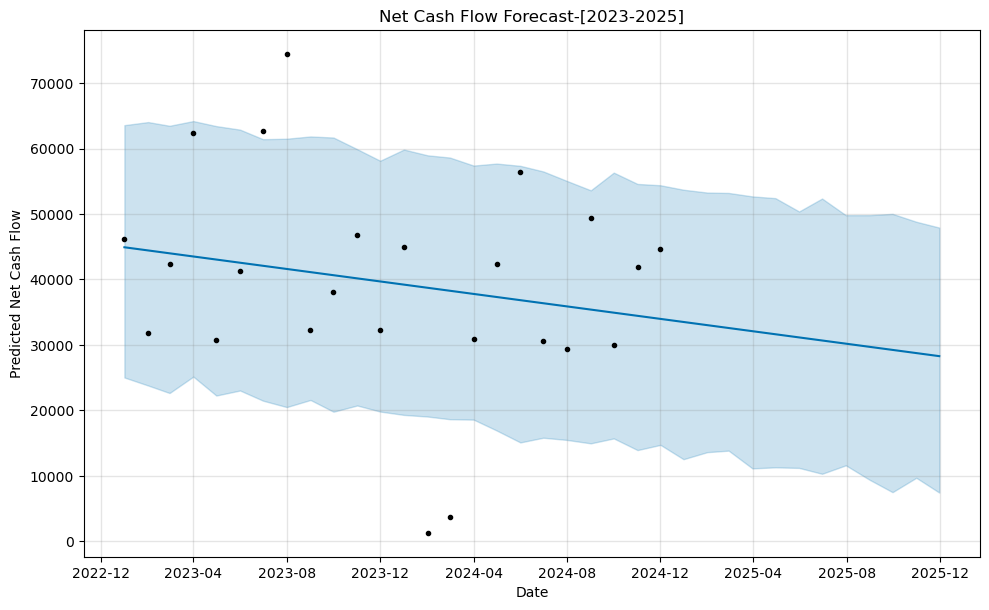

In [16]:
model.plot(forecast)
plt.title("Net Cash Flow Forecast-[2023-2025]")
plt.xlabel("Date")
plt.ylabel("Predicted Net Cash Flow")
plt.show()

In [20]:
forecast_df = forecast[["ds","yhat","yhat_lower","yhat_upper"]].rename(columns={
    "ds":"Month",
   "yhat":"Predicted Net Cash Flow",
 "yhat_lower":"Lower Bond",
"yhat_upper":"Upper Bond"})

In [21]:
forecast_df.tail(5)

,Month,Predicted Net Cash Flow,Lower Bond,Upper Bond
31,2025-07-31,30191.767686,11598.657153,49824.862527
32,2025-08-31,29706.994812,9390.997286,49826.825728
33,2025-09-30,29237.859772,7494.315893,50027.750069
34,2025-10-31,28753.086898,9691.899939,48823.077624
35,2025-11-30,28283.951859,7430.891668,47931.893116


In [ ]:
merged = pd.merge(df,forecast_df,on = "month",how = "outer")